In [8]:
corr_matrix = numerical_df.corr()
print(corr_matrix['churned'].sort_values(ascending=False))

churned           1.000000
MonthlyCharges    0.198040
SeniorCitizen     0.145599
tenure           -0.345593
Name: churned, dtype: float64


                             Feature    Importance
3                       TotalCharges  9.131505e-02
1                             tenure  8.131217e-02
2                     MonthlyCharges  7.350718e-02
5662         Contract_Month-to-month  3.592712e-02
5669  PaymentMethod_Electronic check  2.363424e-02
...                              ...           ...
100            customerID_0214-JHPFW  5.093952e-09
2155           customerID_3810-PJUHR  2.126133e-09
575            customerID_1052-QJIBV  4.867737e-10
2773           customerID_4915-BFSXL  0.000000e+00
2245           customerID_3996-ZNWYK  0.000000e+00

[5671 rows x 2 columns]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



First 5 predictions:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  4950-BDEUX    Male              0      No         No      35           No   
1  7993-NQLJE    Male              0     Yes        Yes      15          Yes   
2  7321-ZNSLA    Male              0     Yes        Yes      13           No   
3  4922-CVPDX  Female              0     Yes         No      26          Yes   
4  2903-YYTBW    Male              0     Yes        Yes       1          Yes   

      MultipleLines InternetService OnlineSecurity  ... StreamingTV  \
0  No phone service             DSL             No  ...         Yes   
1                No     Fiber optic            Yes  ...          No   
2  No phone service             DSL            Yes  ...          No   
3                No             DSL             No  ...         Yes   
4                No             DSL             No  ...          No   

  StreamingMovies        Contract PaperlessBilling            PaymentM

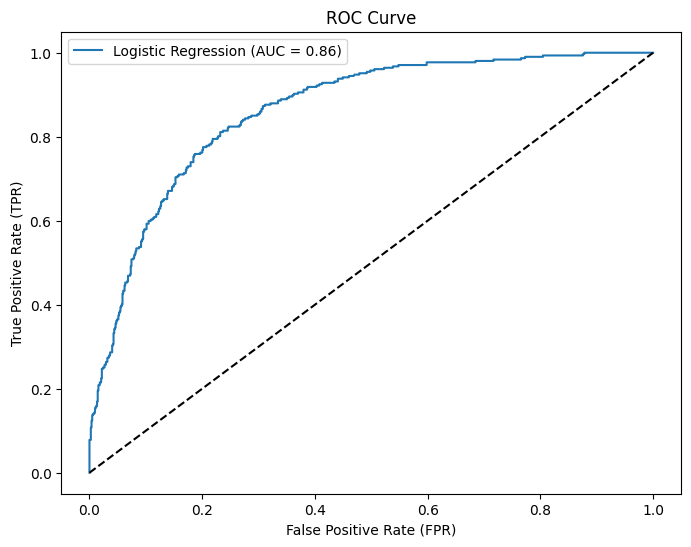

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/training_BqE3R1cmOb0qyAv.csv')
test_df = pd.read_csv('/content/training_BqE3R1cmOb0qyAv.csv')

# Convert 'TotalCharges' to numeric, coercing errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
test_df['TotalCharges'] = pd.to_numeric(test_df['TotalCharges'], errors='coerce')

# Drop rows with NaN values in 'TotalCharges' that were created by coercion
df.dropna(subset=['TotalCharges'], inplace=True)
test_df.dropna(subset=['TotalCharges'], inplace=True)


# Preprocessing: Encode categoricals, handle missing values, etc.
X = pd.get_dummies(df.drop('churned', axis=1))
y = df['churned']

# Feature Importance
model = RandomForestClassifier()
model.fit(X, y)
importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
print(importance.sort_values('Importance', ascending=False))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
clf = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
clf.fit(X_train, y_train)



# Predict probabilities
probabilities = clf.predict_proba(X_test)[:, 1]  # Probability of churn (class=1)

# Apply the same get_dummies to the test set and align columns
test_df_processed = pd.get_dummies(test_df.drop('churned', axis=1))
test_df_processed = test_df_processed.reindex(columns=X_train.columns, fill_value=0)


test_df['churned_prediction'] = clf.predict(test_df_processed)  # 0 or 1
test_df['probability_distribution'] = clf.predict_proba(test_df_processed)[:, 1]  # Probability of churn

test_df.to_csv('predictions.csv', index=False)

print("\nFirst 5 predictions:")
print(test_df.head())
print(f"\nPredictions saved to predictions.csv")

# Calculate AUC
auc_score = roc_auc_score(y_test, probabilities)
print(f"\nAUC Score: {auc_score:.4f}")




# (Optional) Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
X = pd.get_dummies(df.drop('churned', axis=1))
